In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import StationV6 as Station
import Prices

In [19]:
station1 = Station.Station()

In [72]:
dispenser_time_demand = [47]
starting_storage_level = 0
electrolyser_capacity = 22.125*1
storage_capacity = 9.5*4

'''
Yearly simulation
'''
daily_refill_avg = np.zeros(365)
for n in range(365):

    day = n+1

    elec_price = Prices.elec_prices_data(day)

    demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

    if unsatisfied > 0:
        print('Unsatisfied')

    elec_demand = demand * 51.38 # kWh

    refill_cost = np.dot(elec_demand, elec_price/100)

    avg_refill_cost = refill_cost/len(dispenser_time_demand)

    daily_refill_avg[n] = avg_refill_cost


0.16028963056812334
0.41549361840000004
-0.42086491571250007
0.17581034992500005


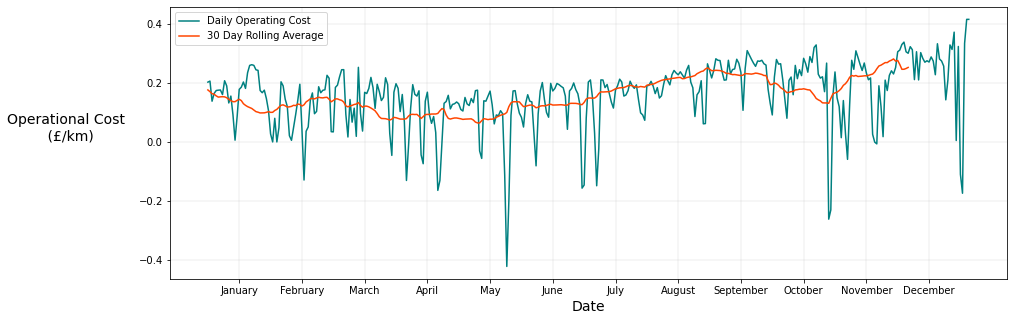

In [73]:
fig, ax = plt.subplots(figsize=[15,5])

N=30
rolling = pd.Series(daily_refill_avg).rolling(window=N).mean().iloc[N-1:].values

ax.plot(daily_refill_avg/400,color='teal',label='Daily Operating Cost')
ax.plot(rolling/400, color='orangered',label='30 Day Rolling Average')

ax.set_ylabel('Operational Cost \n (£/km)',rotation=0, labelpad=70,fontsize=14)
ax.set_xlabel('Date',fontsize=14)

my_xticks = [n for n in range(15,370,30)]
my_xticks_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)
ax.grid(lw=0.2)
ax.legend()

print(np.average(daily_refill_avg)/400)
print(np.max(daily_refill_avg)/400)
print(np.min(daily_refill_avg)/400)
print(np.median(daily_refill_avg)/400)

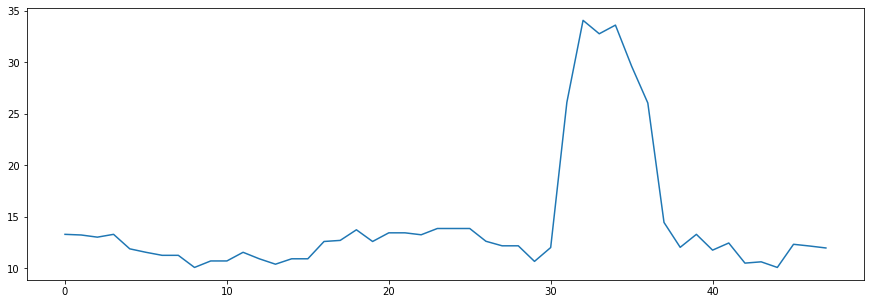

In [43]:
fig, ax = plt.subplots(figsize=[15,5])

day = 364
price = Prices.elec_prices_data(day)

ax.plot(price)

In [58]:
my_xticks = [n for n in range(15,370,30)]
len(my_xticks)

12

In [67]:
N=7
pd.Series(daily_refill_avg).rolling(window=N).mean().iloc[N-1:].values

array([ 85.33087126,  77.82540931,  76.59037798,  80.22726503,
        80.33857338,  83.83214492,  82.43728582,  70.76389368,
        67.08017889,  67.51337395,  66.00497532,  67.07571654,
        65.64411817,  69.92687495,  83.93026274,  94.38371384,
        96.85689014, 100.28861686, 103.50374605, 101.07170972,
        95.86423625,  93.94246497,  87.60957683,  83.20238283,
        75.19659785,  61.62484831,  68.45575508,  59.45860328,
        49.85016307,  53.69972479,  55.20054744,  59.76692567,
        66.55046522,  54.87578602,  55.4047945 ,  56.87178341,
        50.231964  ,  47.69734749,  48.74037819,  49.82336583,
        39.4698591 ,  40.48775342,  39.51539976,  40.53850401,
        40.8626219 ,  36.3341043 ,  35.03763276,  51.54830033,
        67.83377706,  75.94579532,  81.46358344,  86.73405392,
        93.85680167,  90.24494695,  81.89941429,  77.41542003,
        78.60775459,  78.59916128,  78.52236103,  77.74474785,
        92.06806092,  89.53134811,  85.6747499 ,  77.35